# Regresión lineal

En este notebook de vamos a ver cómo modelar datos mediante regresión lineal (multivariada) e interpretando los resultados.

Vamos a introducir por primera vez en la materia la libreria de Python scikit-learn (https://scikit-learn.org/)

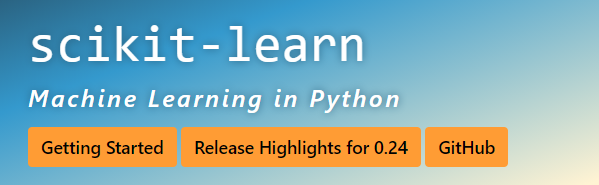


Scikit-learn no solamente es útil, sino que su documentación es excelente. Les recomendamos entrar a la página web y explorarla. Creemos que es posible aprender un montón de machine learning únicamente mirando la documentación de scikit-learn.

##Importamos las librerias

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# cargamos un dataset que tiene scikitlearn
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

Se obtuvieron diez variables basales, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para cada uno de n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio .

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1: T-Cells (a type of white blood cells)
* s2: low-density lipoproteins
* s3: high-density lipoproteins
* s4: thyroid stimulating hormone
* s5: lamotrigine
* s6: blood sugar level

Objetivo: medida cuantitativa de la progresión de la enfermedad.

In [3]:
# veamos como se compone diabetes
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
# X es un array. 
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

Si nos vemos en esta situación y queremos pasarlo a Dataframe para optar a sus funcionalidades, entonces haremos lo siguiente

In [5]:
df_x = pd.DataFrame(X)
df_x

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
# con esto vemos los nombres de las variables
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
# agregamos los nombres de variables para una mejor visualización de los datos. Esto no es estrictamente necesario.
df_x.columns = diabetes.feature_names
df_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
# hacemos algo similar con la variable Y
df_y = pd.DataFrame(y)
df_y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


##Vamos a visualizar el comportamiento de 2 variables al mismo tiempo. Veremos varias combinaciones siempre dejando fija la variable Y

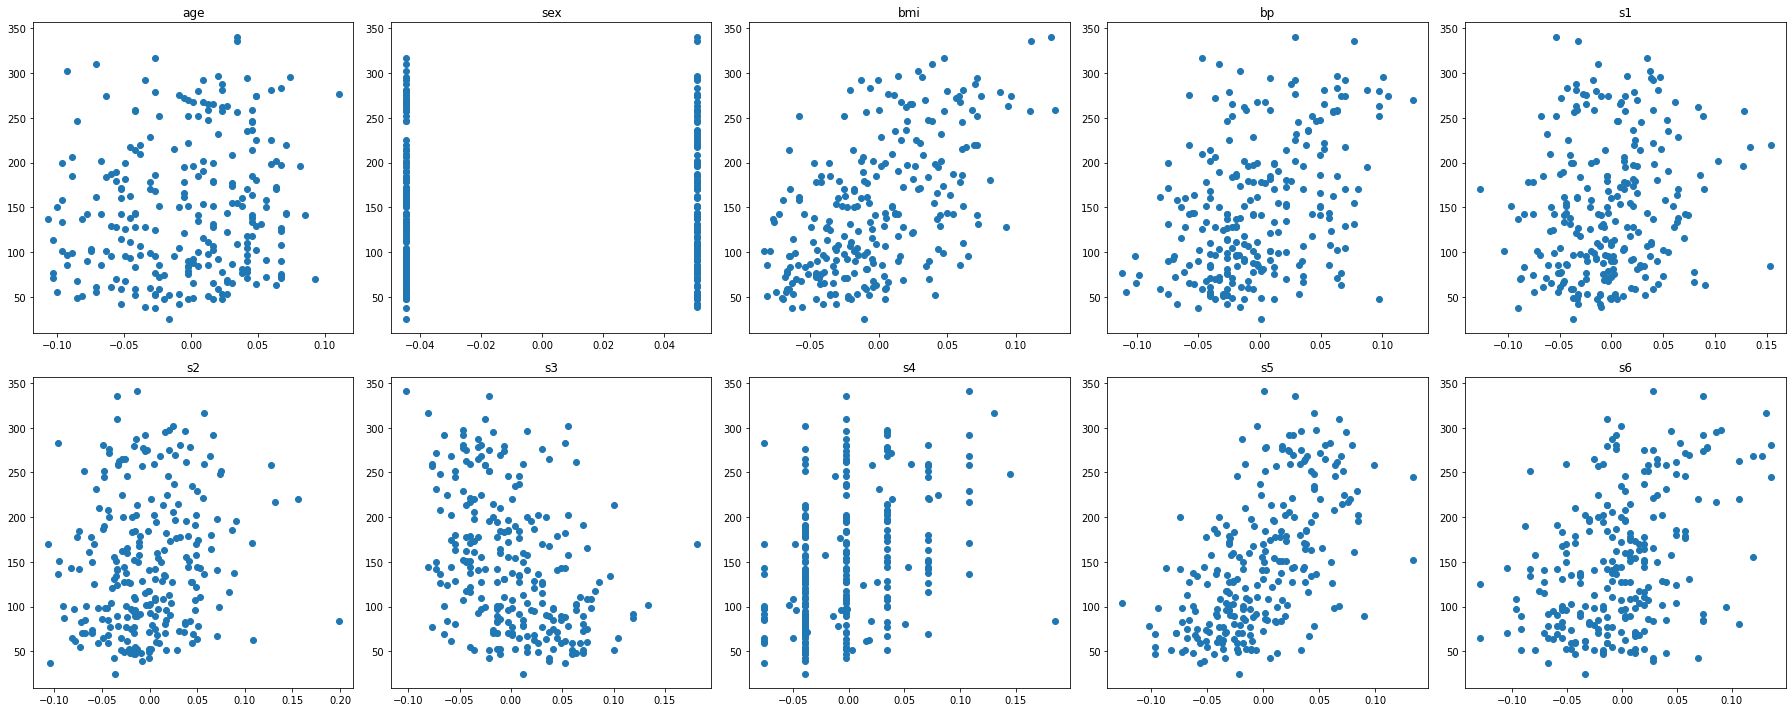

In [14]:
# Vemos la relación de cada variable con la variable Y

# Esto nos permite hacer un arreglo de gráficos. De 2 filas por 5 columnas
filas = 2
col = 5

nombres_col = diabetes.feature_names

# N es la cantidad de datos con los que trabajaremos. Se usa más adelante, atención!!
N = 250 # muestra la cantidad de puntos en el gráfico

fig, axs = plt.subplots(filas, col,figsize=(25,10))

n = 0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].set_title(nombres_col[n])
        axs[i,j].scatter(df_x[nombres_col[n]][:N],df_y[:N])
        n = n+1

fig.tight_layout()

##Probaremos como se ajustan los modelos

Debemos decidir cual variable usaremos para nuestra regresión Juegue probando varias

Coefficients: 
 Intercepto:  [150.65535026] 
Los demas parametros betas: [[659.75869726]]
Mean squared error: 4703.30
Mean absolute error: 56.28
Coefficient of determination: 0.17


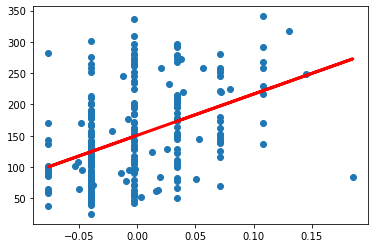

In [19]:
# definimos con cual variable trabajaremos. Debemos entregar el nombre de la variable
var = 's4'

# La función .reshape() permite cambiar la forma del vector. Se recomienda trabajar con arreglos al momento de realizar la regresión
X = np.array(df_x[var][:N]).reshape(-1,1)

# ******************** ACA SE REALIZA LA REGRESION **************************************

# Creamos el objeto de regresion lineal!!!!!
reg_lineal = linear_model.LinearRegression()

# Entrenamos el modelo!!!!!
reg_lineal.fit(X, df_y[:N])

# Hacemos predicciones!!!!
y_predicted = reg_lineal.predict(X) # hacemos predicciones de los mismos datos con los que entrenamos...OJO!!

# ******************** ACA SE TERMINA LA REGRESION **************************************


# Los coeficientes
print('Coefficients: \n', 'Intercepto: ',reg_lineal.intercept_, '\nLos demas parametros betas:',reg_lineal.coef_)

# ******************** ACA SE CALCULAN LAS METRICAS **************************************
# El mean squared error!!!!
print('Mean squared error: %.2f'
      % mean_squared_error(df_y[:N], y_predicted))

# El mean absolute error!!!!
print('Mean absolute error: %.2f'
      % mean_absolute_error(df_y[:N], y_predicted))

# El R2!!!!
print('Coefficient of determination: %.2f'
      % r2_score(df_y[:N], y_predicted))

# ******************** ACA SE TERMINA DE CALCULAR LAS METRICAS **************************************

# Graficamos
plt.scatter(X, df_y[:N])
plt.plot(X, y_predicted, color='red', linewidth=3)
plt.show()

##Como se habrá dado cuenta, la creación del modelo de regresión, el entrenamiento y la predicción de los datos es fácil. SOLO 3 LINEAS DE CODIGO.

##Pero lo importante es preparar todo para llegar a ese punto. Luego, interpretar los datos es muy importante.

#¿Qué puede decir del proceso?




Además, lo invitamos a ir probando variando los valores de N, la variable independiente, etc.

#¿Predecir valores nuevos?

A continuación, un ejemplo:

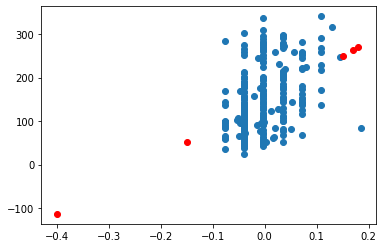

In [20]:
valores_nuevos = np.array([-0.40, -0.15, 0.15, 0.17, 0.18]) # puede probar otros valores y más si quiere.
X_nuevo = valores_nuevos.reshape(-1, 1) 
 
y_nuevo = reg_lineal.predict(X_nuevo)  # hago la predicción para estos nuevos valores

plt.scatter(X,df_y[:N])
plt.scatter(X_nuevo,y_nuevo, color='r')


La predicción siempre será sobre la recta creada con los datos con los cuales fue entrenado el modelo.

#PREGUNTA: ¿QUE NOS FALTA HACER DE LO ESTUDIADO RECIENTEMENTE?

.







.












.








.







.





.





.


#Algo muy importante que debemos hacer es realizar la división de los datos originales en training set y testing set. 

#**Esta será la forma de probar nuestros algoritmos. Lo anterior fue solo un primer ejemplo introductorio.**

Usaremos todos los datos del Dataframe, pero solo una variable independiente.

In [17]:
# recordemos como son los datos
df_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [18]:
df_y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [21]:
# Importamos la función para dividir entre training set y testing set
from sklearn.model_selection import train_test_split

X = np.array(df_x['bmi']).reshape(-1,1) # al ser un solo vector, debemos aplicar .reshape()

# test_size es el tamaño del testing set. 
# random_state es un valor que setea la aleatoriedad del método.
X_train, X_test, Y_train, Y_test = train_test_split(X, df_y, test_size=0.3, random_state=771)

In [22]:
# Creamos el objeto de regresion lineal!!!!!
reg_lineal = linear_model.LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
reg_lineal.fit(X_train, Y_train)

# Hacemos predicciones!!!!
y_predicted = reg_lineal.predict(X_test) # hacemos predicciones de los datos de test

# ******************** ACA SE TERMINA LA REGRESION **************************************


# Los coeficientes
print('Coefficients: \n', 'Intercepto: ',reg_lineal.intercept_, '\nLos demas parametros betas:',reg_lineal.coef_)

# ******************** ACA SE CALCULAN LAS METRICAS **************************************
# El mean squared error!!!!
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_predicted))

# El mean absolute error!!!!
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, y_predicted))

# El R2!!!!
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_predicted))

Coefficients: 
 Intercepto:  [153.01250233] 
Los demas parametros betas: [[970.6731983]]
Mean squared error: 3932.47
Mean absolute error: 52.98
Coefficient of determination: 0.28


##Ahora lo hacemos con 3 variables independientes:

**Regresión multivariada o Regresión lineal multiple**

In [24]:
X = df_x[['bmi', 'bp', 's1']]

X_train, X_test, Y_train, Y_test = train_test_split(X, df_y, test_size=0.3, random_state=771)

In [25]:
# Creamos el objeto de regresion lineal!!!!!
reg_lineal = linear_model.LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
reg_lineal.fit(X_train, Y_train)

# Hacemos predicciones!!!!
y_predicted = reg_lineal.predict(X_test) # hacemos predicciones de los datos de test

# ******************** ACA SE TERMINA LA REGRESION **************************************


# Los coeficientes
print('Coefficients: \n', 'Intercepto: ',reg_lineal.intercept_, '\nLos demas parametros betas:',reg_lineal.coef_)

# ******************** ACA SE CALCULAN LAS METRICAS **************************************
# El mean squared error!!!!
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_predicted))

# El mean absolute error!!!!
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, y_predicted))

# El R2!!!!
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_predicted))

Coefficients: 
 Intercepto:  [153.25857196] 
Los demas parametros betas: [[781.15316158 382.24530423 125.58789273]]
Mean squared error: 3710.41
Mean absolute error: 51.06
Coefficient of determination: 0.32


**¿Cómo interpreta los resultados?**

#¿Puede mejorar el modelo? ¿En que debe fijarse?

#Intente mejorarlo.

In [28]:
L = [1,2,3,4,5,6,7,8,9]
L[:-1]

[1, 2, 3, 4, 5, 6, 7, 8]